# Introducción al numpy con aplicación  a las señales de audio

## Leyendo archivos de audio y obteniendo información
En este primer ejercicio cargaremos los módulos necesarios para el resto de la partes y veremos:
* Cómo cargar las muestras de un archivo de audio.
* Determinar si es stereo o mono
* Determinar la frecuencia de muestreo y la duración de la señal en segundos

In [1]:
#Importaremos los módulos necesarios
%matplotlib inline
import numpy as np
from scipy.io import wavfile
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
import upv_audio # Modulo para cargar y guardar wav como flotantes entre +-1

# Generar gráficos incrustados en cuaderno
%matplotlib inline 

import UPVlog

notebook_filename="01-read_and_info : "
mylogger=UPVlog.UPVlog()

Los ficheros stereo se leen como una matriz de dos columnas, donde la primera columna es el canal izquierdo.

Los ficheros mono se leen como un nd-array de una dimensión.

Los archivos .wav normalmente se almacenan como enteros con signo de 16 bits. No obstante existen archivos .wav con 24 bits por muestra (que se almacenan como enteros de 32 bits con signo), y ficheros .wav que guardan números en coma flotante.

Para trabajar en el mismo formato dentro de numpy, internamente manejaremos las señales como norma general como float64 entre $\pm 1$

Se proporciona un módulo *upv_audio* que contiene una función para leer y otra para escribir que devuelve muestras normalizadas como float64, y que al escribir **satura los valores mayores que 1**.

Permite leer y escribir WAV.

In [2]:
fich1='audios/numeros.wav'
fich2='audios/Xiaomi.wav'
'''Para cada archivo determinar 
fs : frecuencia de muestreo, 
x : array con las muestras, 
ndim: número de dimensiones del array de muestras
dur_muestras: duración en muestras de la señal
num_canales: cantidad de canales de la señal 1: mono, 2: stereo
'''

fs1=None
fs2=None
x1=None
x2=None
ndim1=None
ndim2=None
dur_muestras1=None
dur_muestras2=None
num_chan1=None
num_chan2=None

# Obtenga  el valor de las anteriores cantidades inicializadas como None

### BEGIN SOLUTION
fs1,x1=upv_audio.read('audios/numeros.wav')
fs2,x2=upv_audio.read('audios/Xiaomi.wav')
ndim1=x1.ndim
ndim2=x2.ndim
dur_muestras1 = x1.shape[0]
dur_muestras2 = x2.shape[0]
if ndim1==1:
    num_chan1=1
else:
    num_chan1=x1.shape[1]
if ndim2==1:
    num_chan2=1
else:
    num_chan2=x2.shape[1]
### END SOLUTION


In [3]:
# Comprobaciones visibles.
# Este bloque debe ejecutarse sin errores cuando el anterior esté correcto
# BEGIN TESTS
mylogger.log(notebook_filename + "Testing wav read")
assert fs1 is not None , "El fichero " + fich1 + " no se ha analizado"
assert fs2 is not None , "El fichero " + fich2 + " no se ha analizado"
assert ndim1==1, "El valor de ndim1 no es correcto"
assert ndim2==2, "El valor de ndim2 no es correcto"
assert dur_muestras1==702938, "La duración de "+ fich1 + " no es correcta"
assert dur_muestras2==340992, "La duración de "+ fich2 + " no es correcta"
assert num_chan1==1, "El número de canales de " + fich1 + " no es correcto"
assert num_chan2==2, "El número de canales de " + fich2 + " no es correcto"
assert x1.shape ==(702938,), "La señal x1 no es correcta"
assert x2.shape ==(340992, 2), "La señal x1 no es correcta"
# END TESTS

### Programación de una función para comprobar si un archivo es stereo o no.

Debe programar en la celda siguiente una función que:

* Reciba como entrada el nombre de un archivo

* Devuelva como salida:
    *  *True* si el fichero es stereo

    * *False* si el fichero es mono o con más de 2 canales

In [4]:
def isStereo(filename):
    ''' Recibe el nombre de un archivo
        Devuelve true si el fichero es stereo '''
    ### BEGIN SOLUTION
    fs,x=upv_audio.read(filename)
    if x.ndim !=2:
        return False
    if x.shape[1] !=2:
        return False
    return True
    ### END SOLUTION
    

In [5]:
# Para corrección automática. Hace los mismos tests anteriores
fich3="audios/Xiaomix.wav"
### BEGIN  TESTS
mylogger.log(notebook_filename + "Testing is_stereo")
res1=isStereo(fich1)
res2=isStereo(fich2)
res3=isStereo(fich3)
assert res1 == False
assert res2 == True
assert res3 == False
mylogger.log(notebook_filename + "Success Testing is_stereo")
### END  TESTS

## Determinación de la duración en segundos

Para determinar la duración en segundos, tanto si el fichero es mono o stereo basta con coger el primer valor del "shape" y dividirlo por la frecuencia de muestreo

In [6]:
def duracion_segundos(filename):
    '''Devuelve la duración en segundos de un fichero de audio
    independientemente de si es mono o stereo'''
    ### BEGIN SOLUTION
    fs,x=upv_audio.read(filename)
    return x.shape[0]/fs
    ### END SOLUTION


In [7]:
# prueba
dur1=duracion_segundos(fich1)
dur2=duracion_segundos(fich2)
dur3=duracion_segundos(fich3)
print(f"Dur1={dur1:.3f} *** Dur2=={dur2:.3f} *** Dur3={dur3:.3f}")

### BEGIN TESTS
mylogger.log(notebook_filename + "Testing duracion_segundos")
assert abs(dur1-15.940)< 0.01 and abs(dur2-7.732)< 0.01 and abs(dur3-7.732)< 0.01, "La función duración en segundos no está bien"
mylogger.log(notebook_filename + "Success Testing duracion_segundos")
### END TESTS

### BEGIN HIDDEN TESTS
### AUTOTEST duracion_segundos(fich1)
### AUTOTEST duracion_segundos(fich2)
### AUTOTEST duracion_segundos(fich3)
### END HIDDEN TESTS

Dur1=15.940 *** Dur2==7.732 *** Dur3=7.732


## Representación gráfica
Para terminar este módulo veremos como representar las señales con el eje de tiempos en segundos

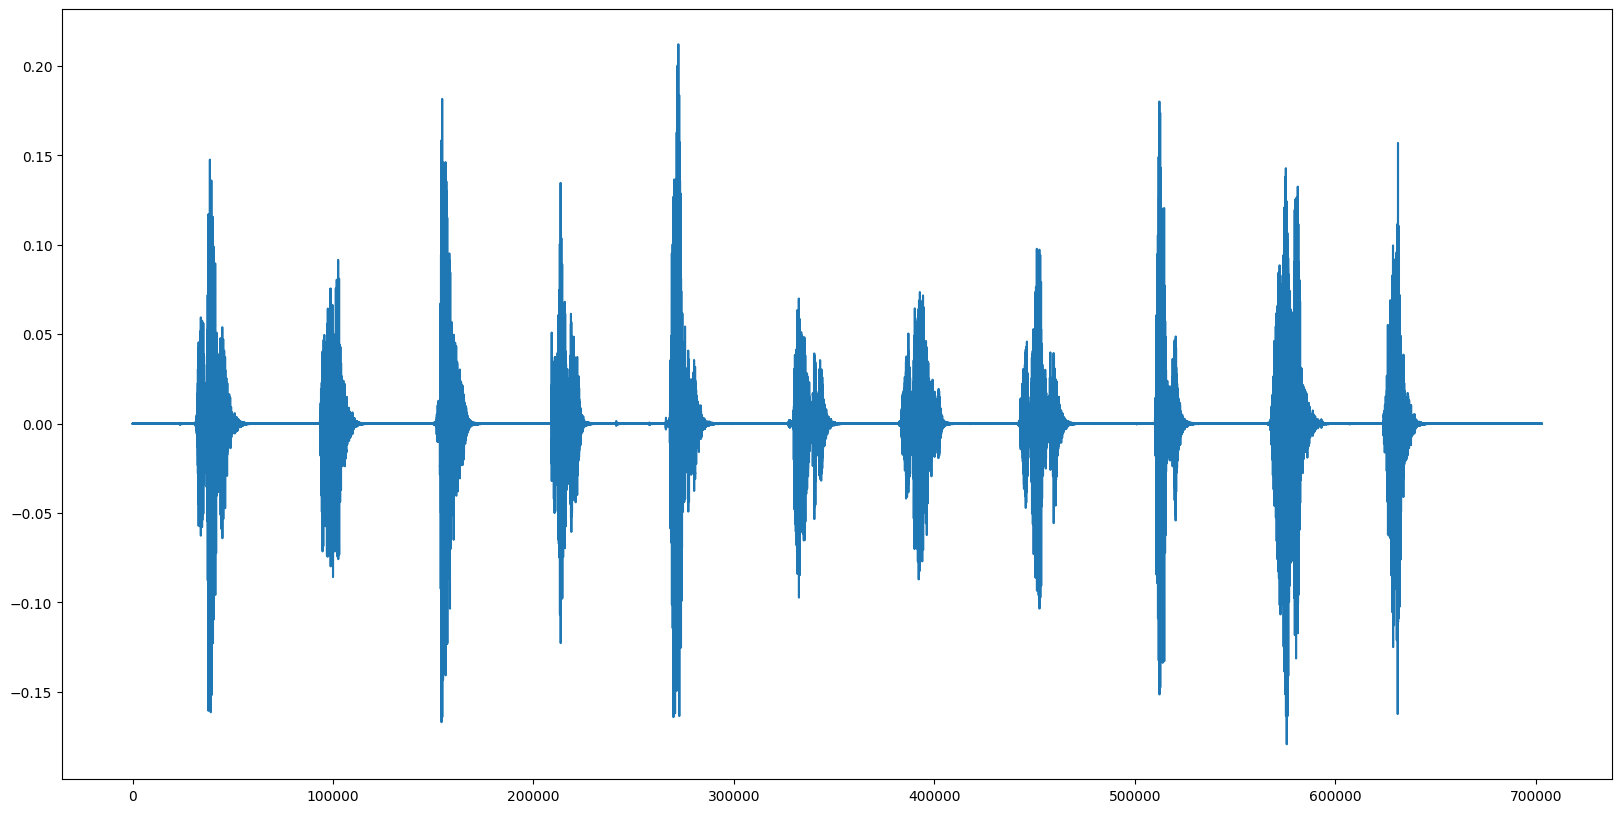

In [8]:
# representacion simple
_=plt.plot(x1)

In [9]:
# Generar el eje de tiempos para que
fs1,x1=upv_audio.read(fich1)
t1=None
### BEGIN SOLUTION
n1=np.arange(x1.shape[0])# Esto genera numeros entre 0,1,2,...,Nmues-1
t1 = n1/fs1
### END SOLUTION


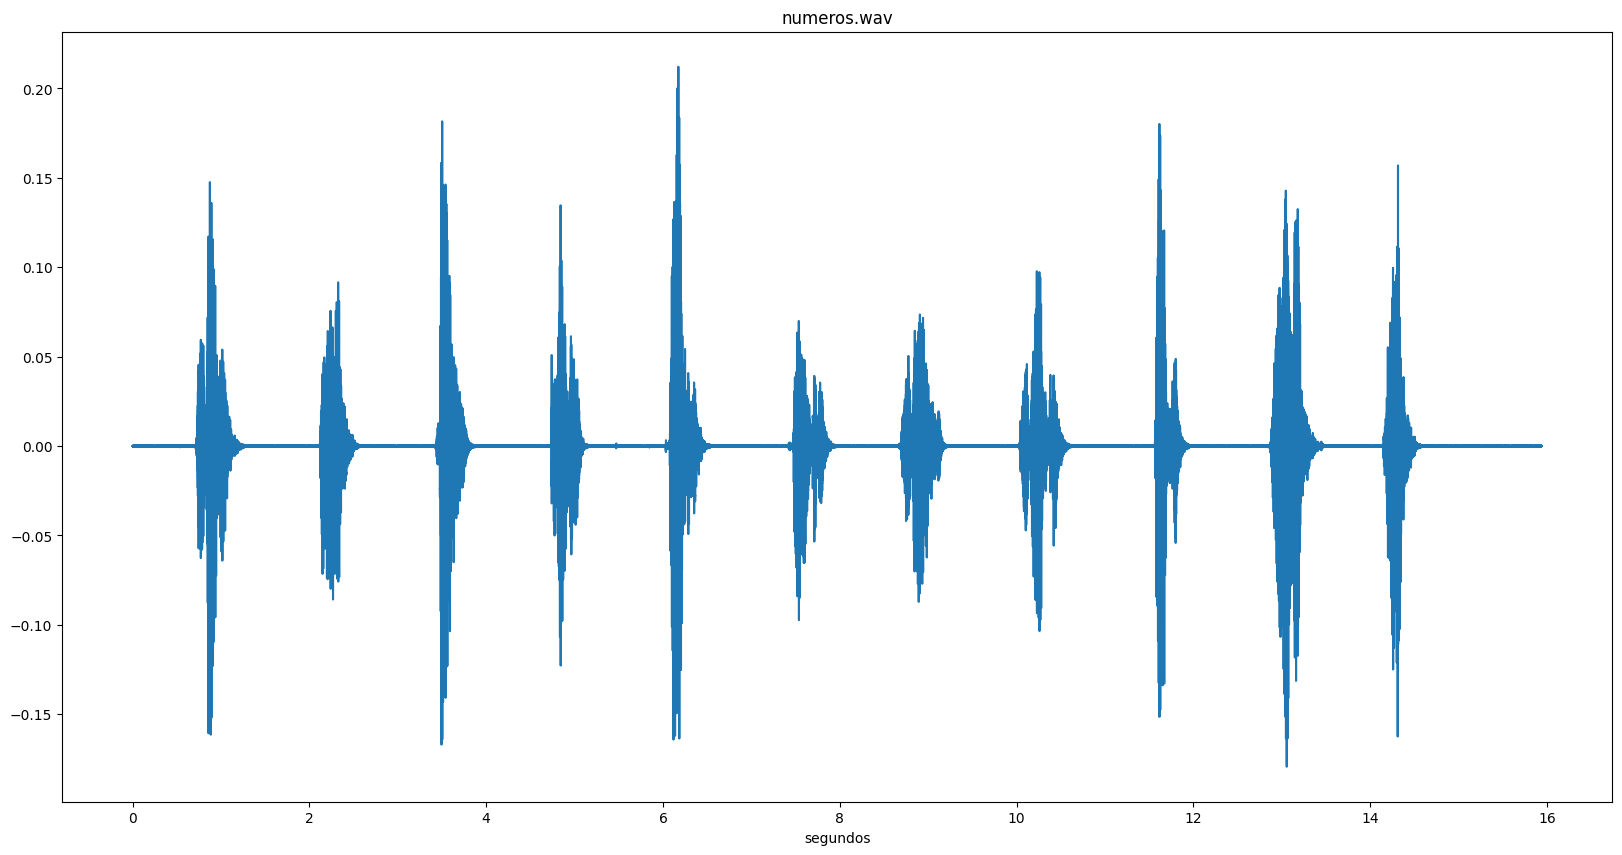

In [10]:
_=plt.plot(t1,x1) 
_=plt.xlabel('segundos')
_=plt.title('numeros.wav')

In [12]:
# Celda para comprobación automática
### BEGIN  TESTS
mylogger.log(notebook_filename + "Testing plot en segundos Delta_t="+ str(round(1/(t1[2000]-t1[1999]))))
assert t1 is not None, "t1 no se ha calculado"
assert "x1" in locals(), "No existe la variable x1"
assert abs(t1[1714] - 0.03886621315192744) < 1e-5, "Los valores de t1 no son correctos"
assert int(round(1/(t1[3000] - t1[2999]))) ==int(fs1), "Los valores de t1 no son correctos"
mylogger.log(notebook_filename + "Success Testing plot en segundos")
### END  TESTS

### BEGIN HIDDEN TESTS
nn1=x1.shape[0]
mit1=np.arange(nn1)/fs1
tol=1e-3
maxdif=np.max(np.abs(mit1-t1))
assert maxdif < tol, "Los valores de t1 no son correctos"
### END HIDDEN TESTS